In [1]:
from blportopt.config import (
    STOCK_TICKERS,
    MARKET_TICKER,
    FACTOR_COMBINATIONS,
)
from blportopt.data_utils import get_data
from blportopt.fama_french_model import famafrench_regression_analysis
from blportopt.trading_strategy import backtest
from blportopt.portfolio_construction_FF import (
    calc_optimal_factors,
    portfolio_construction,
)
from blportopt.portfolio_construction_BL import (
    excess_asset_returns,
    portfolio_data, 
    calc_optimal_portfolio_weights,
)
from blportopt.views import generate_positions
from blportopt.black_litterman_model import (
    BlackLittermanModel,
    calc_asset_allocations,
)

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load Data

* $\textbf{Fama-French Factor Data}$
* $\textbf{Asset Open Prices - Historical}$
* $\textbf{Asset Close Prices - Historical}$
* $\textbf{Asset Returns - Historical}$
* $\textbf{Market (S\&P 500) Returns}$

In [2]:
ff_data, stock_open_data, stock_close_data, stock_returns, market_returns = get_data(stock_tickers=STOCK_TICKERS, market_ticker=MARKET_TICKER)

display(ff_data.head())
display(stock_open_data.head())
display(stock_close_data.head())
display(stock_returns.head())
display(market_returns.head())

--------------------------------------------------Loading Time Series of Factors--------------------------------------------------
--------------------------------------------------Done!--------------------------------------------------
--------------------------------------------------Loading Historical Prices of 20 Equities (Stocks)--------------------------------------------------
--------------------------------------------------Done!--------------------------------------------------
--------------------------------------------------Calculating Historical Returns of 20 Equities (Stocks)--------------------------------------------------
--------------------------------------------------Done!--------------------------------------------------
--------------------------------------------------Loading Historical Prices of SPY--------------------------------------------------
--------------------------------------------------Done!--------------------------------------------------


,Mkt-RF,SMB,HML,RMW,CMA,RF,Mom
Date,,,,,,,
1963-07,-0.0039,-0.0041,-0.0097,0.0068,-0.0118,0.0027,0.0090
1963-08,0.0507,-0.0080,0.0180,0.0036,-0.0035,0.0025,0.0101
1963-09,-0.0157,-0.0052,0.0013,-0.0071,0.0029,0.0027,0.0019
1963-10,0.0253,-0.0139,-0.0010,0.0280,-0.0201,0.0029,0.0312
1963-11,-0.0085,-0.0088,0.0175,-0.0051,0.0224,0.0027,-0.0074


,AAPL,IBM,PG,GE,AMD,WMT,BAC,T,XOM,RRC,BBY,PFE,JPM,C,MCD,KO,JNJ,WHR,MMM,GIS
Date,,,,,,,,,,,,,,,,,,,,
1985-05,0.073316,10.947396,1.195533,3.352935,13.8750,0.293709,0.0,0.393907,1.588313,0.000000,0.086065,0.534895,3.014417,9.588094,1.626323,0.556761,1.098974,6.835614,1.949234,0.849482
1985-06,0.058653,11.306474,1.235671,3.551769,13.3125,0.334329,0.0,0.420779,1.688858,5.494301,0.108275,0.606950,3.279531,10.310025,1.801101,0.551681,1.201773,7.513712,1.931010,0.965685
1985-07,0.062534,10.814892,1.293010,3.595440,13.0625,0.348846,0.0,0.443063,1.677129,0.000000,0.093468,0.596381,3.279730,10.783786,1.851883,0.570009,1.179578,7.864631,2.001578,1.015773
1985-08,0.054772,11.514033,1.327995,3.748279,15.0000,0.312866,0.0,0.436901,1.645854,0.000000,0.110126,0.590180,3.289699,10.422825,1.786646,0.594657,1.185919,8.132976,2.059314,0.913868
1985-09,0.051752,11.161130,1.333793,3.559047,13.2500,0.323480,0.0,0.439585,1.677450,6.043730,0.133262,0.587138,3.190011,10.558186,1.762869,0.588495,1.194358,8.033106,1.990178,0.919934


,AAPL,IBM,PG,GE,AMD,WMT,BAC,T,XOM,RRC,BBY,PFE,JPM,C,MCD,KO,JNJ,WHR,MMM,GIS
Date,,,,,,,,,,,,,,,,,,,,
1985-05,0.059947,11.142305,1.235671,3.489643,13.250,0.327299,1.761784,0.420123,1.661383,5.494300,0.107350,0.599322,3.250072,10.355142,1.801777,0.551682,1.183994,7.366139,1.898605,0.961678
1985-06,0.062103,10.814888,1.287277,3.602717,13.000,0.341359,1.846691,0.440442,1.684949,6.043731,0.093468,0.597891,3.240256,10.738669,1.855270,0.563873,1.176406,7.885269,2.001578,1.019780
1985-07,0.054772,11.481264,1.313079,3.733726,14.875,0.309738,1.751171,0.426678,1.641945,6.043731,0.108275,0.582792,3.259793,10.377702,1.780787,0.593630,1.170065,8.132978,2.052900,0.909587
1985-08,0.051752,11.066143,1.333794,3.551767,13.250,0.323817,1.602587,0.440257,1.649763,6.043731,0.126784,0.585617,3.190012,10.603307,1.756076,0.588495,1.185919,7.926556,1.963085,0.919933
1985-09,0.054340,10.918736,1.307698,3.347979,13.125,0.299200,1.491149,0.418781,1.649625,5.494300,0.126784,0.576491,2.671634,9.633217,1.762869,0.573089,1.133682,7.740993,1.977170,0.994742


,AAPL,IBM,PG,GE,AMD,WMT,BAC,T,XOM,RRC,BBY,PFE,JPM,C,MCD,KO,JNJ,WHR,MMM,GIS
Date,,,,,,,,,,,,,,,,,,,,
1985-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985-06,0.035969,-0.029385,0.041763,0.032403,-0.018868,0.042958,0.048194,0.048362,0.014184,0.100000,-0.129310,-0.002389,-0.003020,0.037037,0.029689,0.022099,-0.006409,0.070475,0.054236,0.060417
1985-07,-0.118048,0.061617,0.020044,0.036364,0.144231,-0.092634,-0.051725,-0.031250,-0.025522,0.000000,0.158420,-0.025253,0.006030,-0.033614,-0.040146,0.052773,-0.005390,0.031414,0.025641,-0.108055
1985-08,-0.055129,-0.036156,0.015776,-0.048734,-0.109244,0.045455,-0.084848,0.031824,0.004762,0.000000,0.170939,0.004846,-0.021407,0.021739,-0.013877,-0.008651,0.013549,-0.025381,-0.043751,0.011374
1985-09,0.050012,-0.013321,-0.019565,-0.057377,-0.009434,-0.076021,-0.069537,-0.048781,-0.000084,-0.090909,0.000000,-0.015584,-0.162500,-0.091489,0.003869,-0.026178,-0.044047,-0.023410,0.007175,0.081319


,SPY
Date,
1993-02,NaN
1993-03,0.017594
1993-04,-0.020986
1993-05,0.026969
1993-06,-0.003455


# Fama-French Model Regression Analysis

## Regression Analysis performed for the following Factor Combinations

* $\textbf{Mkt-RF}$
* $\textbf{SMB}$
* $\textbf{HML}$
* $\textbf{RMW}$
* $\textbf{CMA}$
* $\textbf{Mom}$
* $\textbf{Mkt-RF, SMB, HML, RMW, CMA, Mom}$

In [3]:
famafrench_regression_analysis()

--------------------------------------------------Loading Time Series of Factors--------------------------------------------------
--------------------------------------------------Done!--------------------------------------------------
--------------------------------------------------Loading Historical Prices of 20 Equities (Stocks)--------------------------------------------------
--------------------------------------------------Done!--------------------------------------------------
--------------------------------------------------Calculating Historical Returns of 20 Equities (Stocks)--------------------------------------------------
--------------------------------------------------Done!--------------------------------------------------
--------------------------------------------------Loading Historical Prices of SPY--------------------------------------------------
--------------------------------------------------Done!--------------------------------------------------
-------

# Backtest Factors vs Market Index

--------------------------------------------------Loading Time Series of Factors--------------------------------------------------
--------------------------------------------------Done!--------------------------------------------------
--------------------------------------------------Loading Historical Prices of 20 Equities (Stocks)--------------------------------------------------
--------------------------------------------------Done!--------------------------------------------------
--------------------------------------------------Calculating Historical Returns of 20 Equities (Stocks)--------------------------------------------------
--------------------------------------------------Done!--------------------------------------------------
--------------------------------------------------Loading Historical Prices of SPY--------------------------------------------------
--------------------------------------------------Done!--------------------------------------------------
-------

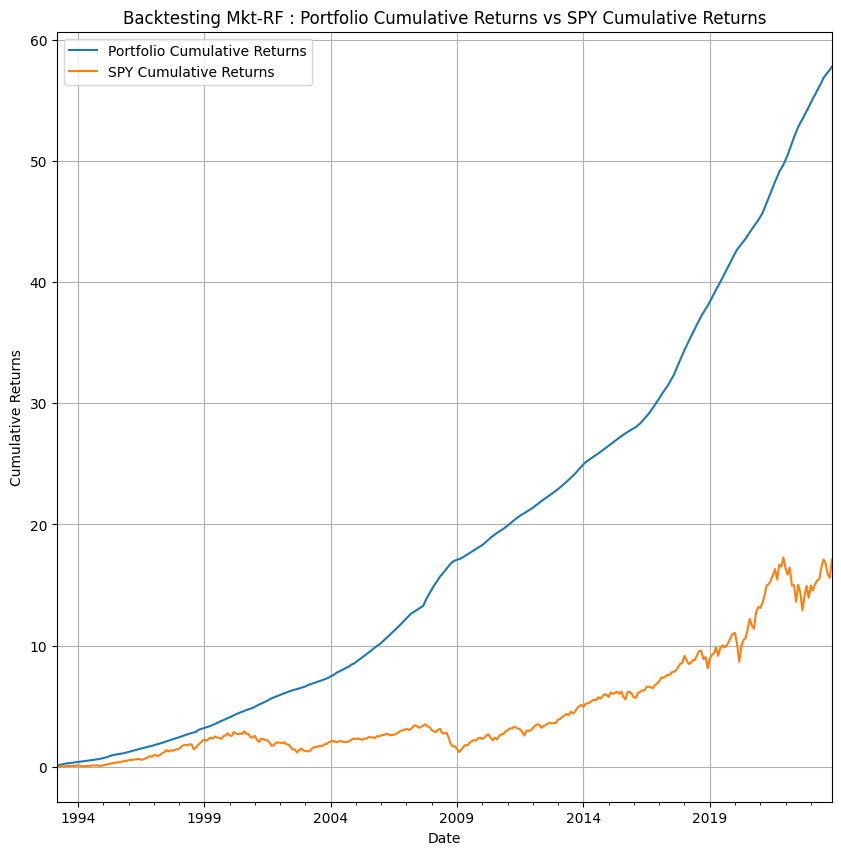

--------------------------------------------------Calculate Alpha : AAPL (Fama French Model)--------------------------------------------------
--------------------------------------------------Fitting Fama-French Factor Model--------------------------------------------------
--------------------------------------------------Done!--------------------------------------------------
--------------------------------------------------Done!--------------------------------------------------
--------------------------------------------------Calculate Alpha : IBM (Fama French Model)--------------------------------------------------
--------------------------------------------------Fitting Fama-French Factor Model--------------------------------------------------
--------------------------------------------------Done!--------------------------------------------------
--------------------------------------------------Done!--------------------------------------------------
-------------------------

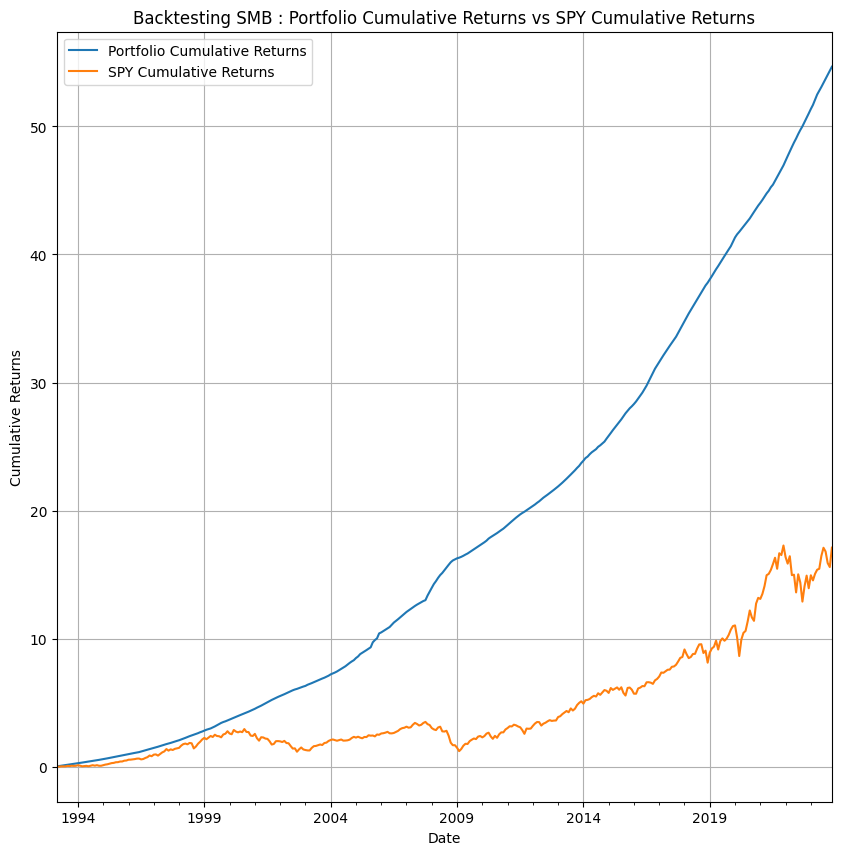

--------------------------------------------------Calculate Alpha : AAPL (Fama French Model)--------------------------------------------------
--------------------------------------------------Fitting Fama-French Factor Model--------------------------------------------------
--------------------------------------------------Done!--------------------------------------------------
--------------------------------------------------Done!--------------------------------------------------
--------------------------------------------------Calculate Alpha : IBM (Fama French Model)--------------------------------------------------
--------------------------------------------------Fitting Fama-French Factor Model--------------------------------------------------
--------------------------------------------------Done!--------------------------------------------------
--------------------------------------------------Done!--------------------------------------------------
-------------------------

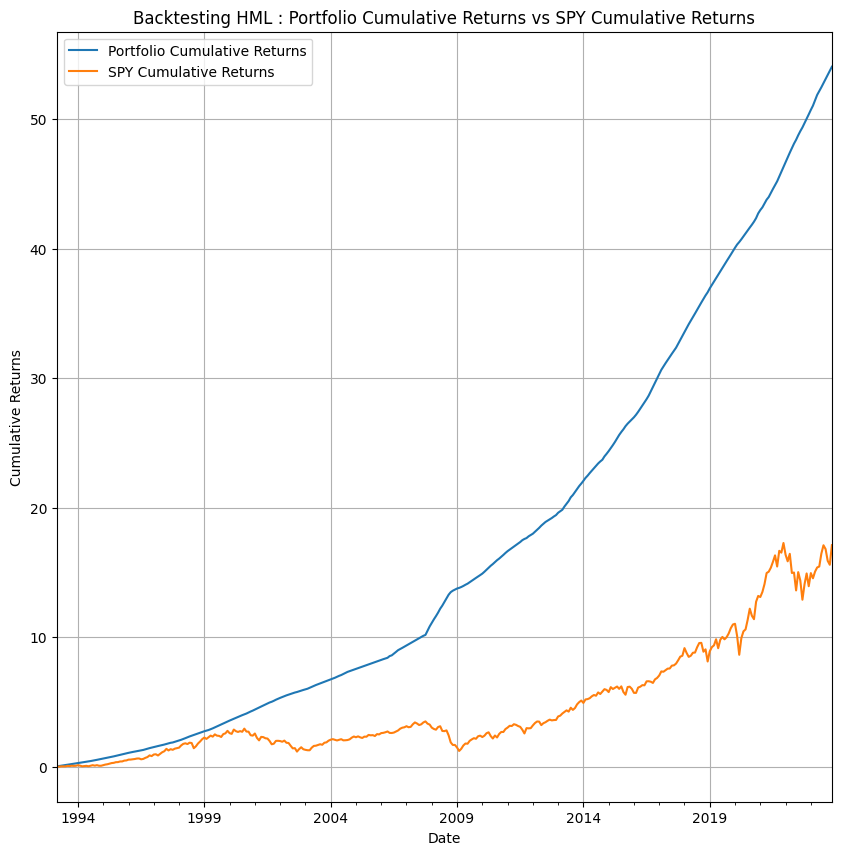

--------------------------------------------------Calculate Alpha : AAPL (Fama French Model)--------------------------------------------------
--------------------------------------------------Fitting Fama-French Factor Model--------------------------------------------------
--------------------------------------------------Done!--------------------------------------------------
--------------------------------------------------Done!--------------------------------------------------
--------------------------------------------------Calculate Alpha : IBM (Fama French Model)--------------------------------------------------
--------------------------------------------------Fitting Fama-French Factor Model--------------------------------------------------
--------------------------------------------------Done!--------------------------------------------------
--------------------------------------------------Done!--------------------------------------------------
-------------------------

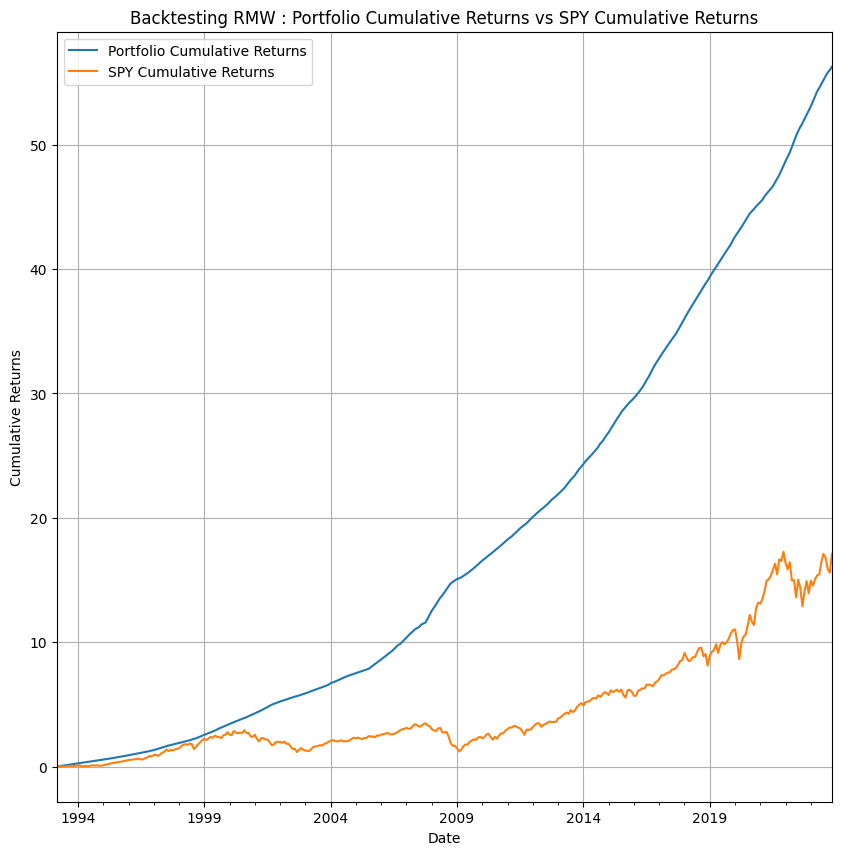

--------------------------------------------------Calculate Alpha : AAPL (Fama French Model)--------------------------------------------------
--------------------------------------------------Fitting Fama-French Factor Model--------------------------------------------------
--------------------------------------------------Done!--------------------------------------------------
--------------------------------------------------Done!--------------------------------------------------
--------------------------------------------------Calculate Alpha : IBM (Fama French Model)--------------------------------------------------
--------------------------------------------------Fitting Fama-French Factor Model--------------------------------------------------
--------------------------------------------------Done!--------------------------------------------------
--------------------------------------------------Done!--------------------------------------------------
-------------------------

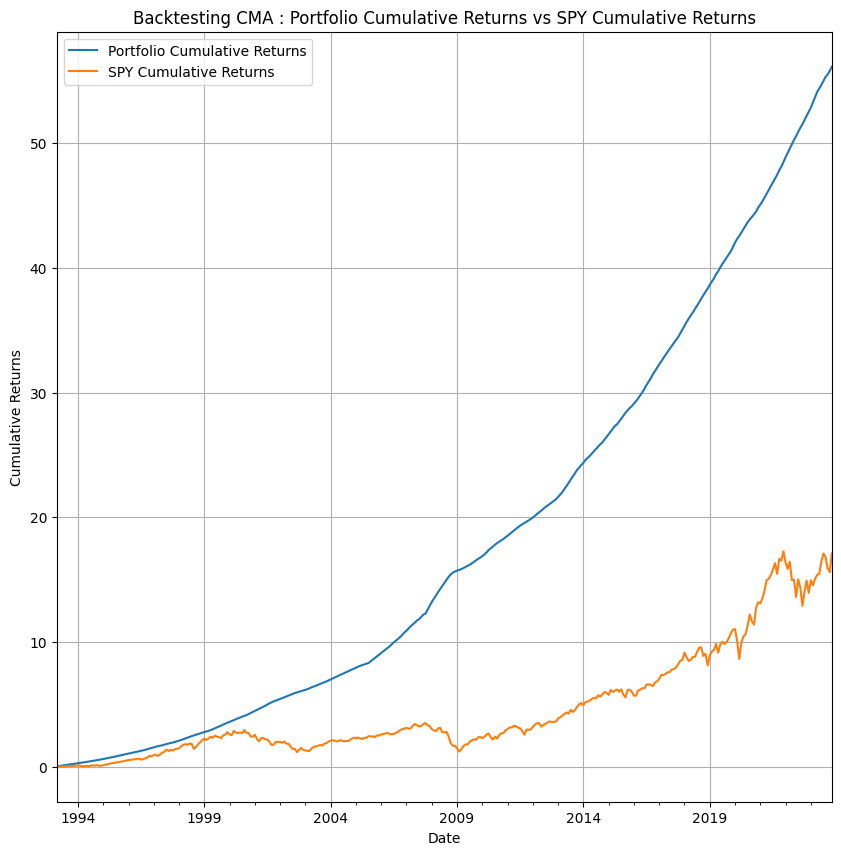

--------------------------------------------------Calculate Alpha : AAPL (Fama French Model)--------------------------------------------------
--------------------------------------------------Fitting Fama-French Factor Model--------------------------------------------------
--------------------------------------------------Done!--------------------------------------------------
--------------------------------------------------Done!--------------------------------------------------
--------------------------------------------------Calculate Alpha : IBM (Fama French Model)--------------------------------------------------
--------------------------------------------------Fitting Fama-French Factor Model--------------------------------------------------
--------------------------------------------------Done!--------------------------------------------------
--------------------------------------------------Done!--------------------------------------------------
-------------------------

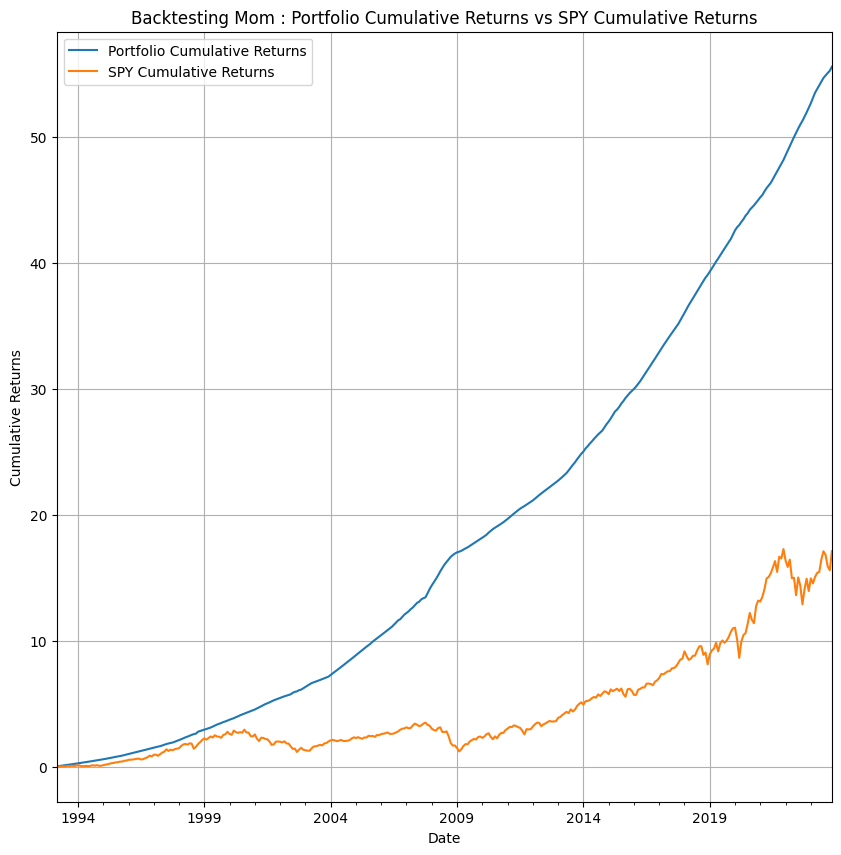

--------------------------------------------------Calculate Alpha : AAPL (Fama French Model)--------------------------------------------------
--------------------------------------------------Fitting Fama-French Factor Model--------------------------------------------------
--------------------------------------------------Done!--------------------------------------------------
--------------------------------------------------Done!--------------------------------------------------
--------------------------------------------------Calculate Alpha : IBM (Fama French Model)--------------------------------------------------
--------------------------------------------------Fitting Fama-French Factor Model--------------------------------------------------
--------------------------------------------------Done!--------------------------------------------------
--------------------------------------------------Done!--------------------------------------------------
-------------------------

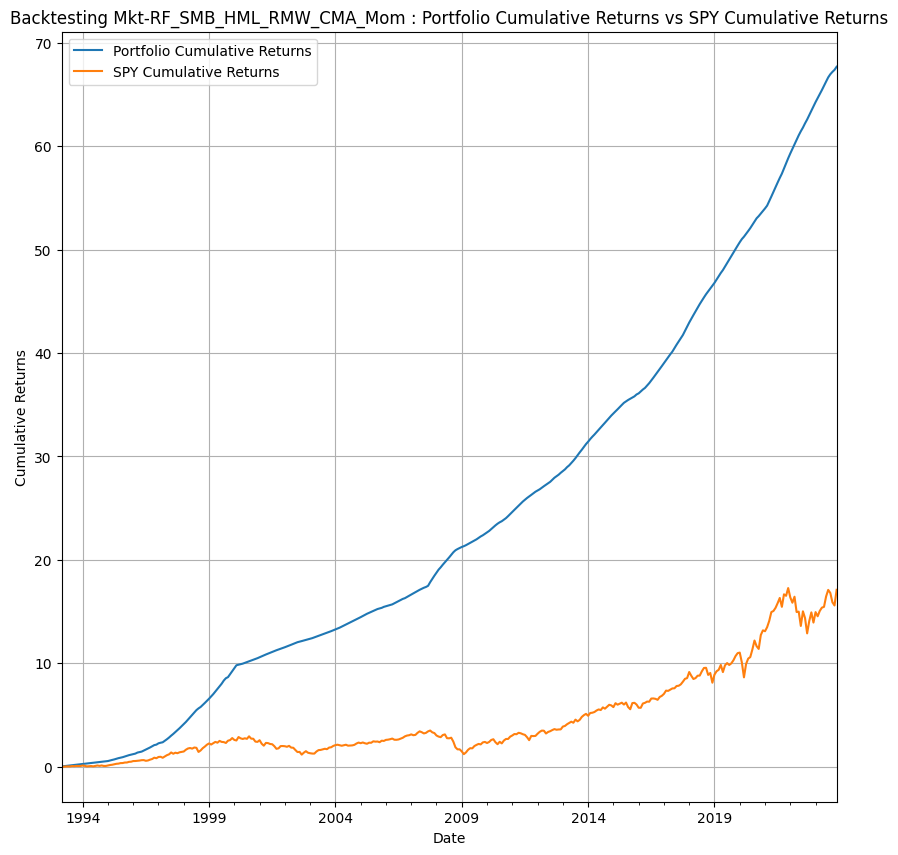

{'Mkt-RF':    Total Profit  Annual Returns  Annual Volatility  Sharpe Ratio  \
 0      57.78247        0.133506           0.024368      5.478697   
 
    Information Ratio  
 0           0.178451  ,
 'SMB':    Total Profit  Annual Returns  Annual Volatility  Sharpe Ratio  \
 0      54.66479        0.131616           0.019743      6.666348   
 
    Information Ratio  
 0           0.165918  ,
 'HML':    Total Profit  Annual Returns  Annual Volatility  Sharpe Ratio  \
 0     54.050561        0.131233           0.018769        6.9919   
 
    Information Ratio  
 0           0.163648  ,
 'RMW':    Total Profit  Annual Returns  Annual Volatility  Sharpe Ratio  \
 0     56.265987        0.132517           0.018008      7.358633   
 
    Information Ratio  
 0           0.172079  ,
 'CMA':    Total Profit  Annual Returns  Annual Volatility  Sharpe Ratio  \
 0      56.13055        0.132448           0.018512      7.154897   
 
    Information Ratio  
 0           0.171916  ,
 'Mom':    Total 

In [4]:
performance = backtest(factor_combinations=FACTOR_COMBINATIONS)
performance

# Portfolio Construction

## 1. Determine Optimal Factors

In [5]:
optimal_factors = calc_optimal_factors(metric="Sharpe Ratio")
print(f"Optimal Factor combination based on Sharpe Ratio: {optimal_factors}")

--------------------------------------------------Loading Time Series of Factors--------------------------------------------------
--------------------------------------------------Done!--------------------------------------------------
--------------------------------------------------Loading Historical Prices of 20 Equities (Stocks)--------------------------------------------------
--------------------------------------------------Done!--------------------------------------------------
--------------------------------------------------Calculating Historical Returns of 20 Equities (Stocks)--------------------------------------------------
--------------------------------------------------Done!--------------------------------------------------
--------------------------------------------------Loading Historical Prices of SPY--------------------------------------------------
--------------------------------------------------Done!--------------------------------------------------
-------

## 2. Determine Optimal Portfolio

In [6]:
optimal_portfolio = portfolio_construction(optimal_factor_combination=optimal_factors, n_assets=5)
optimal_portfolio

--------------------------------------------------Loading Time Series of Factors--------------------------------------------------
--------------------------------------------------Done!--------------------------------------------------
--------------------------------------------------Loading Historical Prices of 20 Equities (Stocks)--------------------------------------------------
--------------------------------------------------Done!--------------------------------------------------
--------------------------------------------------Calculating Historical Returns of 20 Equities (Stocks)--------------------------------------------------
--------------------------------------------------Done!--------------------------------------------------
--------------------------------------------------Loading Historical Prices of SPY--------------------------------------------------
--------------------------------------------------Done!--------------------------------------------------
-------

['GIS', 'XOM', 'T', 'KO', 'WMT']

# Calculate Annual Excess Returns, Volatilities, Covariance, Risk-Free Rate (Historical)

In [7]:
stock_rf_data = excess_asset_returns(tickers=optimal_portfolio)
stock_rf_data

--------------------------------------------------Loading Time Series of Factors--------------------------------------------------


,GIS,XOM,T,KO,WMT,RF
Date,,,,,,
1985-01,NaN,NaN,NaN,NaN,NaN,0.0065
1985-02,0.005385,-0.016217,0.038849,0.052534,-0.005800,0.0058
1985-03,0.048221,0.070616,0.003935,0.096162,-0.025429,0.0062
1985-04,-0.099672,0.017676,-0.000510,-0.017553,0.044841,0.0072
1985-05,0.141834,0.041943,0.086802,-0.015723,0.110735,0.0066
...,...,...,...,...,...,...
2023-07,-0.030054,-0.004593,-0.094155,0.031728,0.012551,0.0045
2023-08,-0.092186,0.032333,0.032256,-0.038409,0.012703,0.0045
2023-09,-0.058542,0.061838,0.011251,-0.068649,-0.017285,0.0043


In [8]:
annual_returns, annual_stdev, cov, rf = portfolio_data(stock_rf_data=stock_rf_data, tickers=optimal_portfolio, freq=12)
print(annual_returns)
print(annual_stdev)
print(cov)
print(rf)

GIS    0.097376
XOM    0.098790
T      0.091938
KO     0.113728
WMT    0.129260
dtype: float64
GIS    0.187115
XOM    0.200056
T      0.221584
KO     0.202624
WMT    0.224542
dtype: float64
          GIS       XOM         T        KO       WMT
GIS  0.035012  0.005792  0.012729  0.011851  0.012104
XOM  0.005792  0.040022  0.016380  0.012375  0.007375
T    0.012729  0.016380  0.049099  0.014818  0.012113
KO   0.011851  0.012375  0.014818  0.041056  0.016474
WMT  0.012104  0.007375  0.012113  0.016474  0.050419
0.030799143468950754


## 1. Mean-Variance Optimization

### $\lambda = 2.24$

In [9]:
optimal_w11 = calc_optimal_portfolio_weights(mu=annual_returns, cov=cov, rf=rf, method="Mean-Variance", risk_aversion=2.24)
optimal_w11

array([ 0.15370469,  0.21047136, -0.05427827,  0.26754332,  0.42255889])

### $\lambda = 0.1$

In [10]:
optimal_w12 = calc_optimal_portfolio_weights(mu=annual_returns, cov=cov, rf=rf, method="Mean-Variance", risk_aversion=0.1)
optimal_w12

array([-3.18805407, -1.08323924, -3.40256751,  2.58168124,  6.09217958])

### $\lambda = 6.0$

In [11]:
optimal_w13 = calc_optimal_portfolio_weights(mu=annual_returns, cov=cov, rf=rf, method="Mean-Variance", risk_aversion=6.0)
optimal_w13

array([0.25208823, 0.25198566, 0.04040765, 0.19901455, 0.25650391])

## Max-Sharpe Ratio Optimization

In [12]:
optimal_w2 = calc_optimal_portfolio_weights(mu=annual_returns, cov=cov, rf=rf, method="Max Sharpe Ratio", risk_aversion=1.0)
optimal_w2

array([0.22890084, 0.2414146 , 0.01705726, 0.21408609, 0.29854121])

# Black-Litterman Model 

## 1. Generate Investor Views based on Earnings Reports

In [13]:
Investor_Views = ["WMT outperforms T", "WMT returns", "XOM outperforms KO"]


P, Q = generate_positions(investor_views=Investor_Views, historical_returns=annual_returns, tickers=optimal_portfolio, from_file=False)

print(P)
print(Q)

--------------------------------------------------Loading Time Series of Factors--------------------------------------------------
[[ 0.  0. -1.  0.  1.]
 [ 0.  0.  0.  0.  1.]
 [ 0. -1.  0.  1.  0.]]
[ 0.06409797  0.05495965 -0.10253939]


## 2. Posterior Returns and Asset Allocation Computation

### $\lambda =2.24$

In [14]:
sharpe_ratio=0.5
risk_aversion=2.24

bl_model = BlackLittermanModel(cov=cov, weights=optimal_w11, risk_aversion=risk_aversion, T=len(stock_rf_data), position_matrix=P, return_vector=Q)
posterior_returns = bl_model.posterior_return
print(f"poster returns for lambda = {risk_aversion} : {posterior_returns}")

optimal_weights = calc_asset_allocations(risk_aversion=risk_aversion, cov=cov, posterior_returns=posterior_returns)
print(f"Optimal Weights for lambda = {risk_aversion} : {optimal_weights}")


poster returns for lambda = 2.24 : [0.02401295 0.05941634 0.01668451 0.01670775 0.05985517]
Optimal Weights for lambda = 2.24 : [ 0.15370469  0.68465953 -0.17836087 -0.20664484  0.50329475]


### $\lambda = 0.1$

In [15]:
risk_aversion=0.1

optimal_weights = calc_asset_allocations(risk_aversion=risk_aversion, cov=cov, posterior_returns=posterior_returns)
print(f"Optimal Weights for lambda = {risk_aversion} : {optimal_weights}")

Optimal Weights for lambda = 0.1 : [ 3.44298509 15.33637337 -3.99528348 -4.62884445 11.27380247]


### $\lambda = 6.0$

In [17]:
risk_aversion=6.0

optimal_weights = calc_asset_allocations(risk_aversion=risk_aversion, cov=cov, posterior_returns=posterior_returns)
print(f"Optimal Weights for lambda = {risk_aversion} : {optimal_weights}")

Optimal Weights for lambda = 6.0 : [ 0.05738308  0.25560622 -0.06658806 -0.07714741  0.18789671]
